In [1]:
# Импорт библиотеки PVLIB
import pvlib
# Импорт библиотеки Pandas
import pandas as pd
# Импорт библиотеки datetime
import datetime
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Импорт класса Location, позволяющего описывать месторасположение СЭС
from pvlib.location import Location

In [3]:
# Создание объекта "точка А" с заданными координатами, часовым поясом, высотой над уровнем моря, наименованием
A = Location(55.4, 37.4, tz='Europe/Moscow', altitude=156, name='Moscow')

In [4]:
print(A)

Location: 
  name: Moscow
  latitude: 55.4
  longitude: 37.4
  altitude: 156
  tz: Europe/Moscow


In [5]:
# Задание диапазона дат
times = pd.date_range(start=datetime.datetime(2021,3,23), end=datetime.datetime(2021,3,23,23), freq='1H')
times

DatetimeIndex(['2021-03-23 00:00:00', '2021-03-23 01:00:00',
               '2021-03-23 02:00:00', '2021-03-23 03:00:00',
               '2021-03-23 04:00:00', '2021-03-23 05:00:00',
               '2021-03-23 06:00:00', '2021-03-23 07:00:00',
               '2021-03-23 08:00:00', '2021-03-23 09:00:00',
               '2021-03-23 10:00:00', '2021-03-23 11:00:00',
               '2021-03-23 12:00:00', '2021-03-23 13:00:00',
               '2021-03-23 14:00:00', '2021-03-23 15:00:00',
               '2021-03-23 16:00:00', '2021-03-23 17:00:00',
               '2021-03-23 18:00:00', '2021-03-23 19:00:00',
               '2021-03-23 20:00:00', '2021-03-23 21:00:00',
               '2021-03-23 22:00:00', '2021-03-23 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [6]:
# Преобразование заданного диапазона дат к местному времени
times_loc = times.tz_localize(A.pytz)
times_loc

DatetimeIndex(['2021-03-23 00:00:00+03:00', '2021-03-23 01:00:00+03:00',
               '2021-03-23 02:00:00+03:00', '2021-03-23 03:00:00+03:00',
               '2021-03-23 04:00:00+03:00', '2021-03-23 05:00:00+03:00',
               '2021-03-23 06:00:00+03:00', '2021-03-23 07:00:00+03:00',
               '2021-03-23 08:00:00+03:00', '2021-03-23 09:00:00+03:00',
               '2021-03-23 10:00:00+03:00', '2021-03-23 11:00:00+03:00',
               '2021-03-23 12:00:00+03:00', '2021-03-23 13:00:00+03:00',
               '2021-03-23 14:00:00+03:00', '2021-03-23 15:00:00+03:00',
               '2021-03-23 16:00:00+03:00', '2021-03-23 17:00:00+03:00',
               '2021-03-23 18:00:00+03:00', '2021-03-23 19:00:00+03:00',
               '2021-03-23 20:00:00+03:00', '2021-03-23 21:00:00+03:00',
               '2021-03-23 22:00:00+03:00', '2021-03-23 23:00:00+03:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq=None)

In [7]:
# Расчёт положения Солнца для заданных моментов времени, георграфических координат
SPA = pvlib.solarposition.spa_python(times_loc, A.latitude, A.longitude)
SPA

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2021-03-23 00:00:00+03:00,123.115824,123.115824,-33.115824,-33.115824,348.907080,-6.697283
2021-03-23 01:00:00+03:00,123.413849,123.413849,-33.413849,-33.413849,6.866001,-6.684763
2021-03-23 02:00:00+03:00,121.099043,121.099043,-31.099043,-31.099043,24.413855,-6.672240
2021-03-23 03:00:00+03:00,116.497320,116.497320,-26.497320,-26.497320,40.727253,-6.659715
2021-03-23 04:00:00+03:00,110.143592,110.143592,-20.143592,-20.143592,55.542806,-6.647187
2021-03-23 05:00:00+03:00,102.597231,102.597231,-12.597231,-12.597231,69.069415,-6.634657
2021-03-23 06:00:00+03:00,94.353778,94.353778,-4.353778,-4.353778,81.752338,-6.622124
2021-03-23 07:00:00+03:00,85.659161,85.842808,4.340839,4.157192,94.115934,-6.609589
2021-03-23 08:00:00+03:00,77.392962,77.465632,12.607038,12.534368,106.704948,-6.597052
2021-03-23 09:00:00+03:00,69.599831,69.644507,20.400169,20.355493,120.066613,-6.584512


Text(0.5, 1.0, 'Положение Солнца на небосводе')

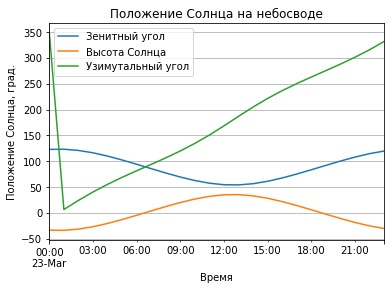

In [8]:
# Вывод графика изменения положения Солнца на небосводе во времени
SPA['zenith'].plot(label='Зенитный угол')
SPA['elevation'].plot(label='Высота Солнца')
SPA['azimuth'].plot(label='Узимутальный угол')
plt.grid()
plt.legend()
plt.ylabel('Положение Солнца, град.')
plt.xlabel('Время')
plt.title('Положение Солнца на небосводе')

In [9]:
# Расчёт заатмосферной солнечной радиации за заданный период времени методом "asce"
DNI_extra_asce = pvlib.irradiance.get_extra_radiation(times_loc, method='asce')
DNI_extra_asce

2021-03-23 00:00:00+03:00    1373.248063
2021-03-23 01:00:00+03:00    1373.248063
2021-03-23 02:00:00+03:00    1373.248063
2021-03-23 03:00:00+03:00    1373.248063
2021-03-23 04:00:00+03:00    1373.248063
2021-03-23 05:00:00+03:00    1373.248063
2021-03-23 06:00:00+03:00    1373.248063
2021-03-23 07:00:00+03:00    1373.248063
2021-03-23 08:00:00+03:00    1373.248063
2021-03-23 09:00:00+03:00    1373.248063
2021-03-23 10:00:00+03:00    1373.248063
2021-03-23 11:00:00+03:00    1373.248063
2021-03-23 12:00:00+03:00    1373.248063
2021-03-23 13:00:00+03:00    1373.248063
2021-03-23 14:00:00+03:00    1373.248063
2021-03-23 15:00:00+03:00    1373.248063
2021-03-23 16:00:00+03:00    1373.248063
2021-03-23 17:00:00+03:00    1373.248063
2021-03-23 18:00:00+03:00    1373.248063
2021-03-23 19:00:00+03:00    1373.248063
2021-03-23 20:00:00+03:00    1373.248063
2021-03-23 21:00:00+03:00    1373.248063
2021-03-23 22:00:00+03:00    1373.248063
2021-03-23 23:00:00+03:00    1373.248063
dtype: float64

In [10]:
# Определение видимой высоты Солнца над горизонтом
apparent_elevation_asce = SPA['apparent_elevation']
# Определение СР при ясном небе
VerySimpleClearSky_asce = pvlib.clearsky.simplified_solis(apparent_elevation_asce, aod700=0.1, precipitable_water=1.0, pressure=101325.0, dni_extra=DNI_extra_asce)
VerySimpleClearSky_asce

,ghi,dni,dhi
2021-03-23 00:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 01:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 02:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 03:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 04:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 05:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 06:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 07:00:00+03:00,39.908474,253.181627,30.941847
2021-03-23 08:00:00+03:00,170.180205,541.941230,60.563669
2021-03-23 09:00:00+03:00,308.321030,680.548641,78.492640


Text(0, 0.5, 'Иррадиация')

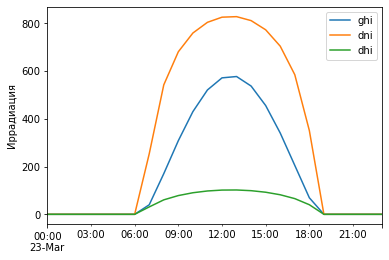

In [11]:
VerySimpleClearSky_asce.plot()
plt.legend()
plt.ylabel('Иррадиация')

In [12]:
# Определение видимого зенитного угла Солнца
apparent_zenith_asce = SPA['apparent_zenith']

# Определение зентиного угла Солнца
zenith_asce = SPA['zenith']
# Определение относительной атмосферной массы
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.atmosphere.get_relative_airmass.html
airmass_relative_asce = pvlib.atmosphere.get_relative_airmass(zenith_asce, model='simple')
# Определение абсолютной атмосферной массы
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.atmosphere.get_absolute_airmass.html
airmass_absolute_asce = pvlib.atmosphere.get_absolute_airmass(airmass_relative_asce, pressure=101325.0)

# Определение Linke Turbidity
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.clearsky.lookup_linke_turbidity.html
linke_turbidity_asce = pvlib.clearsky.lookup_linke_turbidity(times_loc, A.latitude, A.longitude, filepath=None, interp_turbidity=True)

SimpleClearSky_asce = pvlib.clearsky.ineichen(apparent_zenith_asce, airmass_absolute_asce, linke_turbidity_asce, altitude=0, dni_extra=DNI_extra_asce, perez_enhancement=False)
SimpleClearSky_asce

,ghi,dni,dhi
2021-03-23 00:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 01:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 02:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 03:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 04:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 05:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 06:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 07:00:00+03:00,21.789779,144.353415,10.863744
2021-03-23 08:00:00+03:00,161.858322,570.191513,37.406544
2021-03-23 09:00:00+03:00,309.006042,738.852788,51.460570


Text(0, 0.5, 'Иррадиация')

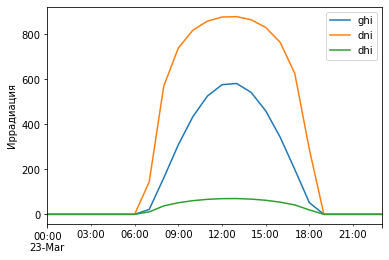

In [13]:
SimpleClearSky_asce.plot()
plt.legend()
plt.ylabel('Иррадиация')

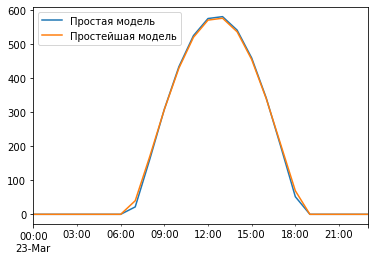

In [14]:
SimpleClearSky_asce['ghi'].plot(label='Простая модель')
VerySimpleClearSky_asce['ghi'].plot(label='Простейшая модель')
plt.legend()

<AxesSubplot:>

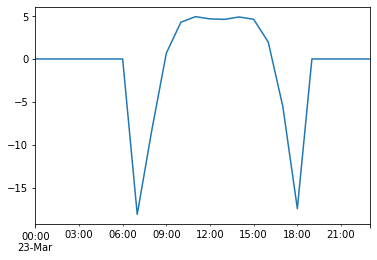

In [15]:
asce_method = (SimpleClearSky_asce['ghi']-VerySimpleClearSky_asce['ghi']).plot(label='Разница')
asce_method

In [16]:
# Расчёт заатмосферной солнечной радиации за заданный период времени методом "nrel"
DNI_extra_nrel = pvlib.irradiance.get_extra_radiation(times_loc, method='nrel')
DNI_extra_nrel

2021-03-23 00:00:00+03:00    1375.479061
2021-03-23 01:00:00+03:00    1375.447242
2021-03-23 02:00:00+03:00    1375.415419
2021-03-23 03:00:00+03:00    1375.383590
2021-03-23 04:00:00+03:00    1375.351756
2021-03-23 05:00:00+03:00    1375.319918
2021-03-23 06:00:00+03:00    1375.288074
2021-03-23 07:00:00+03:00    1375.256225
2021-03-23 08:00:00+03:00    1375.224370
2021-03-23 09:00:00+03:00    1375.192511
2021-03-23 10:00:00+03:00    1375.160646
2021-03-23 11:00:00+03:00    1375.128775
2021-03-23 12:00:00+03:00    1375.096900
2021-03-23 13:00:00+03:00    1375.065019
2021-03-23 14:00:00+03:00    1375.033132
2021-03-23 15:00:00+03:00    1375.001240
2021-03-23 16:00:00+03:00    1374.969343
2021-03-23 17:00:00+03:00    1374.937440
2021-03-23 18:00:00+03:00    1374.905531
2021-03-23 19:00:00+03:00    1374.873617
2021-03-23 20:00:00+03:00    1374.841697
2021-03-23 21:00:00+03:00    1374.809772
2021-03-23 22:00:00+03:00    1374.777840
2021-03-23 23:00:00+03:00    1374.745903
dtype: float64

In [17]:
# Определение видимой высоты Солнца над горизонтом
apparent_elevation_nrel = SPA['apparent_elevation']
# Определение СР при ясном небе
VerySimpleClearSky_nrel = pvlib.clearsky.simplified_solis(apparent_elevation_nrel, aod700=0.1, precipitable_water=1.0, pressure=101325.0, dni_extra=DNI_extra_nrel)
VerySimpleClearSky_nrel

,ghi,dni,dhi
2021-03-23 00:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 01:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 02:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 03:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 04:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 05:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 06:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 07:00:00+03:00,39.966834,253.551866,30.987095
2021-03-23 08:00:00+03:00,170.425120,542.721163,60.650829
2021-03-23 09:00:00+03:00,308.757596,681.512262,78.603781


Text(0, 0.5, 'Иррадиация')

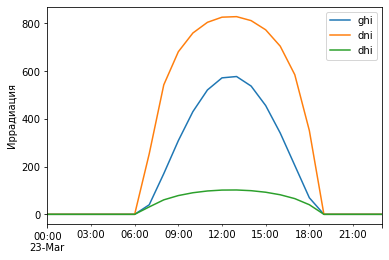

In [18]:
VerySimpleClearSky_nrel.plot()
plt.legend()
plt.ylabel('Иррадиация')

In [19]:
# Определение видимого зенитного угла Солнца
apparent_zenith_nrel = SPA['apparent_zenith']

# Определение зентиного угла Солнца
zenith_nrel = SPA['zenith']
# Определение относительной атмосферной массы
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.atmosphere.get_relative_airmass.html
airmass_relative_nrel = pvlib.atmosphere.get_relative_airmass(zenith_nrel, model='simple')
# Определение абсолютной атмосферной массы
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.atmosphere.get_absolute_airmass.html
airmass_absolute_nrel = pvlib.atmosphere.get_absolute_airmass(airmass_relative_nrel, pressure=101325.0)

# Определение Linke Turbidity
# https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.clearsky.lookup_linke_turbidity.html
linke_turbidity_nrel = pvlib.clearsky.lookup_linke_turbidity(times_loc, A.latitude, A.longitude, filepath=None, interp_turbidity=True)

SimpleClearSky_nrel = pvlib.clearsky.ineichen(apparent_zenith_nrel, airmass_absolute_nrel, linke_turbidity_nrel, altitude=0, dni_extra=DNI_extra_nrel, perez_enhancement=False)
SimpleClearSky_nrel

,ghi,dni,dhi
2021-03-23 00:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 01:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 02:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 03:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 04:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 05:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 06:00:00+03:00,0.000000,0.000000,0.000000
2021-03-23 07:00:00+03:00,21.821643,144.564510,10.879630
2021-03-23 08:00:00+03:00,162.091260,571.012103,37.460378
2021-03-23 09:00:00+03:00,309.443579,739.898965,51.533435


Text(0, 0.5, 'Иррадиация')

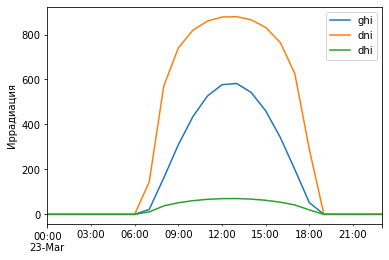

In [20]:
SimpleClearSky_nrel.plot()
plt.legend()
plt.ylabel('Иррадиация')

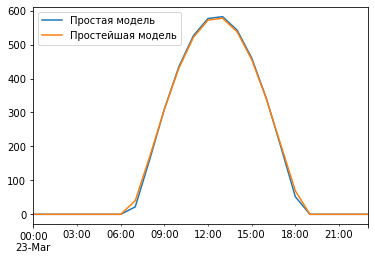

In [21]:
SimpleClearSky_nrel['ghi'].plot(label='Простая модель')
VerySimpleClearSky_nrel['ghi'].plot(label='Простейшая модель')
plt.legend()

<AxesSubplot:>

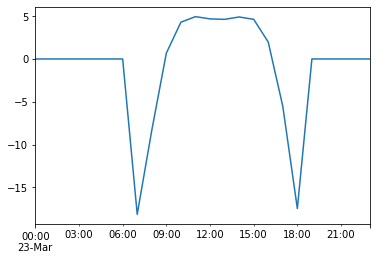

In [23]:
nrel_method = (SimpleClearSky_nrel['ghi']-VerySimpleClearSky_nrel['ghi']).plot(label='Разница')
nrel_method

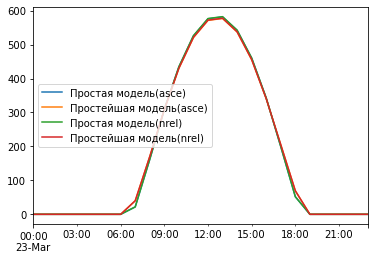

In [27]:
SimpleClearSky_asce['ghi'].plot(label='Простая модель(asce)')
VerySimpleClearSky_asce['ghi'].plot(label='Простейшая модель(asce)')
SimpleClearSky_nrel['ghi'].plot(label='Простая модель(nrel)')
VerySimpleClearSky_nrel['ghi'].plot(label='Простейшая модель(nrel)')
plt.legend()

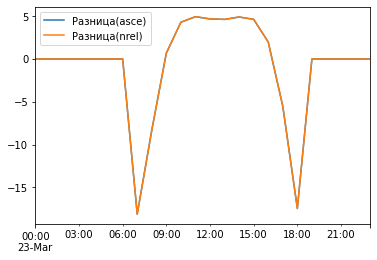

In [28]:
asce_method = (SimpleClearSky_asce['ghi']-VerySimpleClearSky_asce['ghi']).plot(label='Разница(asce)')
nrel_method = (SimpleClearSky_nrel['ghi']-VerySimpleClearSky_nrel['ghi']).plot(label='Разница(nrel)')
plt.legend()